In [5]:
import os
import io
import IPython.display
from PIL import Image
import transformers


In [6]:
!pip install diffusers

In [7]:
from diffusers import StableDiffusionPipeline
import torch

def generate_image(prompt, num_images=1, guidance_scale=7.5, num_inference_steps=50, height=512, width=512):

    model_id = "runwayml/stable-diffusion-v1-5"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    pipe.enable_attention_slicing()

    # image pipeine
    images = pipe(
        prompt,
        num_images_per_prompt=num_images,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        height=height,
        width=width
    ).images

    return images

In [8]:
!pip install accelerate

In [9]:
prompt = "A tiger in the zoo"



In [10]:
def display_images(images):

    for image in images:
        # Converting the PIL Image to bytes

        img_bytes = io.BytesIO()
        image.save(img_bytes, format='PNG')
        img_bytes.seek(0)

        # Displaying the image

        from IPython.display import Image as IPythonImage
        display(IPythonImage(data=img_bytes.read()))

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

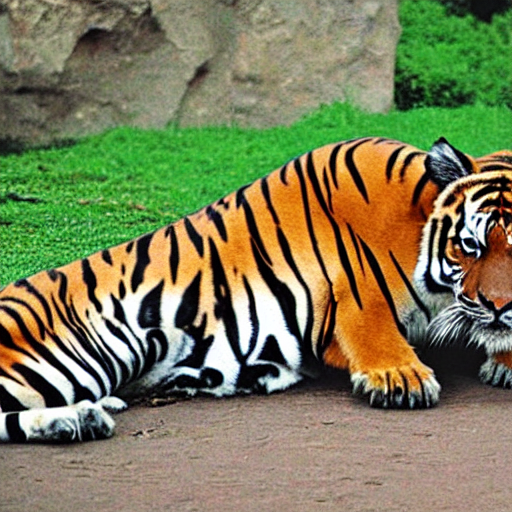

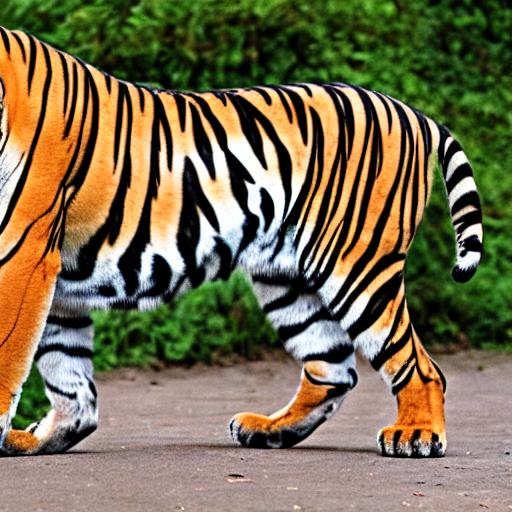

In [11]:
result = generate_image(prompt, num_images=2)
display_images(result)

In [12]:
!pip install gradio

In [13]:
import gradio as gr


In [14]:
import os
os.environ['PORT8000'] = '8000'

In [15]:
gr.close_all()

demo = gr.Interface(
    fn=generate_image,
    inputs=[
        gr.Textbox(label="Your prompt"),
        gr.Slider(minimum=1, maximum=4, value=1, step=1, label="Number of images")
    ],
    outputs=[gr.Gallery(label="Generated Images")],
    title="Image Generation with Stable Diffusion",
    description="Generate images with Stable Diffusion",
    allow_flagging="never",

)

demo.launch(share=True, server_port=int(os.environ['PORT8000']))

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1f0528a94ea74999d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [16]:
demo.close()

Closing server running on port: 8000
